## Case Study: Hacker Statistics
In this case study, you will use a combination of random number generation, loops, and data visualization techniques to calculate your chances of winning a bet by simulating random events. The focus is on using hacker statistics to analyze randomness and its distribution in a fun, practical context.
#### Random Numbers
Random numbers are an essential concept in many fields, especially in simulations, games, and probability theory. In Python, we use the random module to generate random numbers.

1. Random Float  
To generate a random float (decimal number) between 0 and 1, you can use the random() function from the random module.

In [2]:
import random # Import random module
random_float = random.random() # This is to generate a random float between 0 and 1, so it won't return the values 0 or 1
print(random_float)

0.3721996648452901


2. Roll the Dice  
Simulating a dice roll is a common example of generating random numbers. A standard die has six faces, numbered 1 through 6. We can generate a random integer between 1 and 6.

In [4]:
dice_roll = random.randint(1, 6)  # Generates a random integer between 1 and 6
print(dice_roll)
# Also you could generate a random float more than or less than 1 by adding it to a random integer, like so
random_intflt = random.randint(-10,10) + random.random()
print(random_intflt)

1
-6.315986061859123


3. Determine Your Next Move  
Imagine you're playing a game where you roll the dice, and depending on the roll, you make a move. If you roll 4 or higher, you move forward. If the roll is less than 4, you stay.

In [5]:
move = "Stay" # Set a null move
dice_roll = random.randint(1, 6) # Set the dice
if dice_roll >= 4: # Set the conditions
    move = "Move forward"
print(f"Dice roll: {dice_roll}, Next move: {move}") #Print

Dice roll: 5, Next move: Move forward


#### Random Walk
A random walk is a path that consists of taking steps in random directions. You can simulate a random walk in one-dimensional space (like moving along a line) and then extend it to 2D (like moving on a grid).

1. The Next Step  
For the random walk, you can simulate movement along a line by generating random steps, where each step can be either a +1 (forward) or a -1 (backward).

In [6]:
steps = 100  # Number of steps
position = 0  # Starting position
walk = [position]
for step in range(steps):
    position += random.choice([-1, 1])  # Randomly choose -1 or 1
    walk.append(position)
print(walk)

[0, -1, -2, -1, -2, -1, -2, -1, -2, -3, -4, -5, -4, -3, -2, -3, -2, -3, -2, -1, -2, -3, -2, -1, -2, -3, -4, -3, -4, -3, -4, -3, -4, -5, -6, -5, -6, -7, -6, -7, -8, -9, -10, -9, -10, -9, -8, -7, -6, -7, -6, -7, -6, -7, -6, -7, -8, -7, -8, -9, -10, -11, -10, -9, -8, -7, -6, -7, -8, -7, -6, -7, -8, -7, -6, -5, -4, -3, -4, -5, -4, -5, -4, -3, -4, -5, -6, -7, -8, -9, -10, -9, -8, -7, -8, -9, -8, -7, -8, -9, -10]


2. How Low Can You Go?
You can use a random walk to see how low you can go by checking if the position ever reaches a negative value.

In [7]:
min_position = min(walk)
print(f"The lowest position reached during the walk is: {min_position}")
max_position = max(walk)
print(f"The highest position reached during the walk is: {max_position}")

The lowest position reached during the walk is: -5
The highest position reached during the walk is: 8


2. Visualize the Walk  
Matplotlib is great for visualizing the random walk. You can plot the walk on a graph.

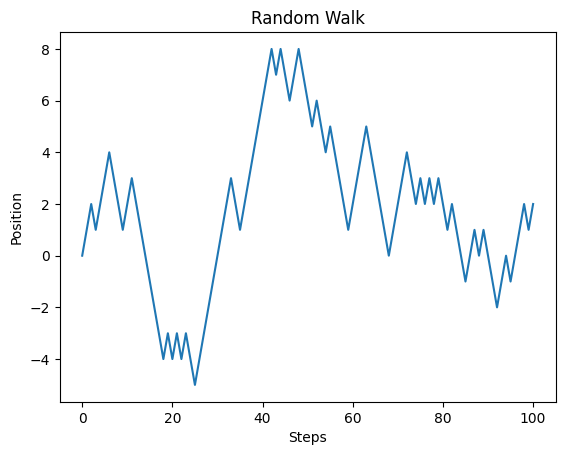

In [10]:
import matplotlib.pyplot as plt
plt.plot(walk)
plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Random Walk')
plt.show()

#### Distribution
A random walk can be repeated many times to simulate different outcomes and create a distribution of the results.

1. Simulate Multiple Walks  
You can simulate multiple random walks and plot the distribution of the final positions.

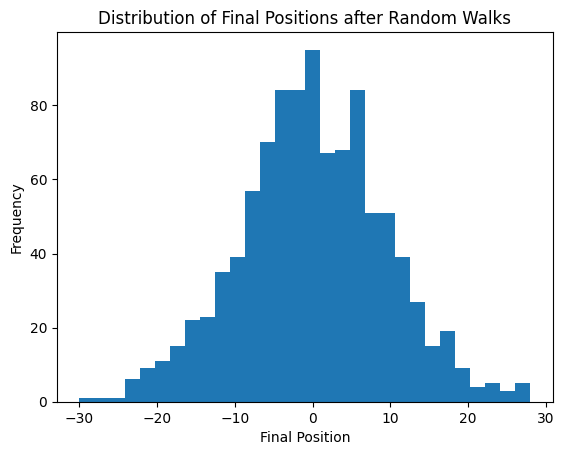

In [12]:
walks = 1000  # Number of walks
walk_length = 100  # Number of steps in each walk

final_positions = []

for _ in range(walks):
    position = 0
    for _ in range(walk_length):
        position += random.choice([-1, 1])
    final_positions.append(position)

# Visualize the distribution
plt.hist(final_positions, bins=30)
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Distribution of Final Positions after Random Walks')
plt.show()

2. Implement Clumsiness  
You can simulate clumsiness in the walk by introducing a bias where steps are not entirely random. For example, there’s a 70% chance to move forward and a 30% chance to move backward.

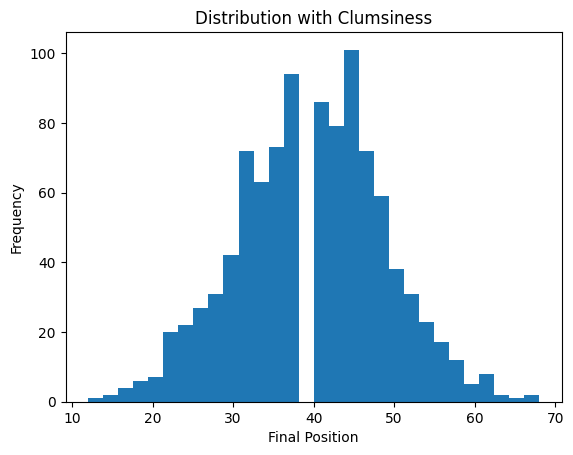

In [13]:
biased_walks = 1000
biased_final_positions = []

for _ in range(biased_walks):
    position = 0
    for _ in range(walk_length):
        step = 1 if random.random() < 0.7 else -1  # 70% chance to move forward
        position += step
    biased_final_positions.append(position)

# Visualize the biased distribution
plt.hist(biased_final_positions, bins=30)
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Distribution with Clumsiness')
plt.show()

3. Plot Distribution  
The histogram shows the distribution of final positions after multiple random walks, both with and without clumsiness. You can now see how the bias affects the distribution.

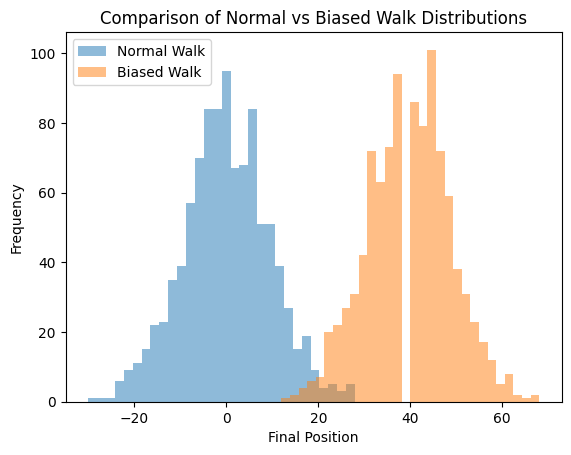

In [14]:
# Plotting both distributions for comparison
plt.hist(final_positions, bins=30, alpha=0.5, label="Normal Walk")
plt.hist(biased_final_positions, bins=30, alpha=0.5, label="Biased Walk")
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Comparison of Normal vs Biased Walk Distributions')
plt.legend()
plt.show()

4. Calculate the Odds  
You can calculate the odds of ending up at a certain position by counting how many times a specific outcome occurs.

In [15]:
target_position = 0
target_count = final_positions.count(target_position)
odds = target_count / walks
print(f"Odds of ending at position {target_position}: {odds}")

Odds of ending at position 0: 0.095


#### Practice Project: Betting Simulation
In this project, you will simulate betting on the outcome of random walks. Your goal is to calculate the odds of winning a bet based on your random walk simulation.

1. Simulate 10,000 random walks, each with 100 steps.
2. Place a bet on a specific position (e.g., 0).
3. Calculate how often you win the bet (end up at position 0).
4. Plot the distribution of final positions and calculate the probability of winning the bet.

Wins: 791 
Odds: 7.91%


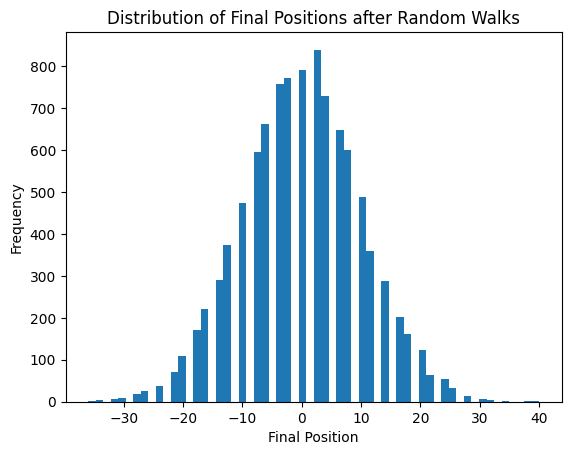

In [3]:
import random
import matplotlib.pyplot as plt
ws = 10000  # Number of walks
wsl = 100  # Number of steps in each walk

bet = int(input("Enter your guess position:"))

flp = []

for _ in range(ws):
    ps = 0
    for _ in range(wsl):
        ps += random.choice([-1, 1])
    flp.append(ps)

wins = flp.count(bet)
odds = wins/ws

print("Wins:", wins,"\nOdds:", f"{odds*100}%")
# Visualize the distribution
plt.hist(flp, bins=60)
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Distribution of Final Positions after Random Walks')
plt.show()

##### Bonus Problem: Advanced Betting Strategy
Now, take the concept further by introducing a more sophisticated betting strategy. Rather than betting on a fixed position, you can simulate betting on a range of positions.   Calculate the odds of landing within a specified range (e.g., between -5 and 5). Then, compare the odds of betting on a single position vs. a range.

Total Wins: 336 
Odds: 3.36%


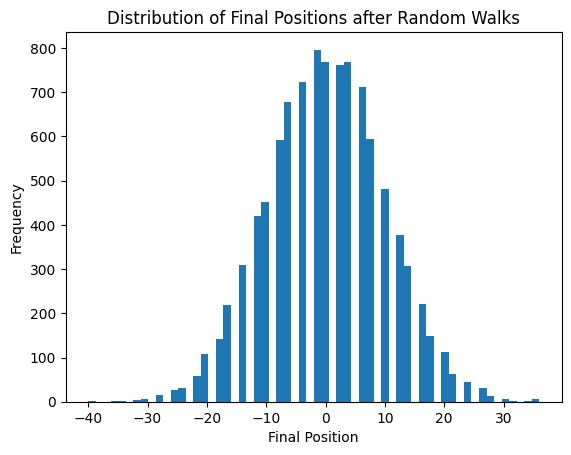

[0, 1, -2, -3, 2, -1, 2, 1, -2, 3, -1, 2, 1, 2, -3, -1, -1, -2, 1, -2, -1, -1, -2, 3, -1, 1, 3, 1, -3, 1, -1, 2, -2, -1, 2, 3, 3, -3, 0, 3, -1, 2, 3, 0, 0, 1, -1, -1, 1, -3, -1, 2, -3, -2, -1, -3, 3, -2, 0, -1, -3, -2, 0, 1, 0, -2, 0, -2, 1, 1, 0, 1, -1, 0, -2, 0, -3, 0, 2, 2, 3, 2, 0, 2, -2, 1, 0, 1, 2, 3, -1, -1, 2, -3, 1, 0, 0, -1, -3, 0, -2, 3, -2, 1, 2, -2, 0, 2, 2, -1, -2, 2, 1, 0, 2, 0, 2, 1, 0, -3, -1, 3, -2, 3, -1, -3, -3, -3, 2, -2, -1, -2, 3, -1, -1, -3, 3, 0, -1, -1, 1, 0, 2, -2, 2, 0, -2, 0, -3, -2, -1, 1, -3, -2, 3, -1, 0, 3, 0, 2, 0, -3, 3, 3, 1, 1, -1, -2, -2, 0, 1, -2, -1, 0, 2, 0, 3, 0, 3, 1, -3, 0, 1, 3, -3, 1, -1, 3, 1, 3, 1, -2, 2, 2, 2, 0, 3, -2, 2, 3, 1, 1, 2, 1, -3, 0, -1, -1, 2, -1, -2, -2, 3, 3, -3, 3, 2, 3, -1, 3, 3, -1, -3, -2, 3, -1, 1, -3, 2, 3, 1, 3, -3, 3, 3, -1, 3, -1, 1, 3, -2, 3, 3, -1, 2, 3, -3, 3, -2, 3, -1, -1, -2, 2, -3, -3, -2, -1, 2, 1, -1, 3, 1, 3, 2, -3, 3, 2, -2, -3, 2, 3, -2, -1, 1, -3, 2, -1, 0, -3, -3, 3, 3, -3, 2, 2, 0, 1, -1, 3, -2, -1, 

In [7]:
import random
import matplotlib.pyplot as plt

ws = 10000  # Number of walks
wsl = 100  # Number of steps in each walk

# Input the range for the bet
bet_min = int(input("Enter the minimum position of your range: "))
bet_max = int(input("Enter the maximum position of your range: "))

flp = []
betted = []
wins = 0  # Count the number of wins

for i in range(ws): # Loop for walks
    ps = 0
    bet = random.randint(bet_min,bet_max)
    for j in range(wsl): # Loop for steps
        ps += random.choice([-1, 1])
    if ps == bet:
        wins += 1
    betted.append(bet)
    flp.append(ps)

odds = wins / ws # Odds formula

print("Total Wins:", wins,"\nOdds:", f"{odds*100}%") # Print wins and odds

# Visualize the distribution
plt.hist(flp, bins=60)
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Distribution of Final Positions after Random Walks')
plt.show()
print(betted)